In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from collections import Counter



In [54]:
documents = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [55]:
words = []

for n in range(len(documents)):
    sublist = (documents[n].split())
    for i in range(len(sublist)):
        words.append(sublist[i].lower())

In [56]:
words_2 = set(words)
words_2

{'and',
 'first',
 'is',
 'one',
 'one.',
 'second',
 'sentence.',
 'sentence?',
 'the',
 'third',
 'this'}

In [59]:
Counter(words)

Counter({'this': 4,
         'is': 4,
         'the': 4,
         'first': 2,
         'sentence.': 2,
         'one': 1,
         'second': 1,
         'and': 1,
         'third': 1,
         'one.': 1,
         'sentence?': 1})

In [60]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# X.torray() is BoW
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [61]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


# Random Arbitrary datasets

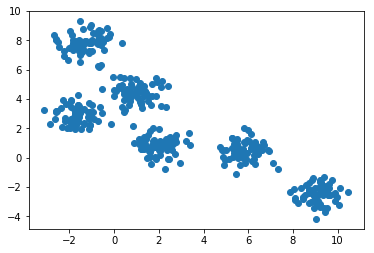

In [78]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=400, centers=6,
                          random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1])

In [82]:
# from figures import plot_kmeans_interactive

# plot_kmeans_interactive()

In [83]:
from sklearn.cluster import KMeans

In [84]:
km = KMeans(n_clusters=6)
km.fit(X)
km.cluster_centers_

array([[ 9.1503528 , -2.43150064],
       [-1.63449575,  2.87862014],
       [-1.27880609,  7.79984381],
       [ 1.97132986,  0.81399817],
       [ 5.8230229 ,  0.49601923],
       [ 0.96423313,  4.41793436]])

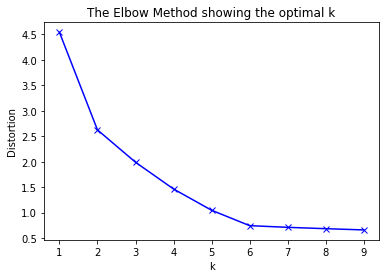

In [85]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# combine clusters with words

In [90]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [91]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [92]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[0]
[1]
